## EDA 및 전처리

### EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.color'] = 'blue'
plt.rcParams['axes.grid'] = True

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
print(f"shape of train: {train.shape}")
display(train)
print(f"shape of test: {test.shape}")
display(test)

shape of train: (1108, 21)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
id,,,,,,,,,,,,,,,,,,,,,
0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,7,1,8,7,0,0,0,0,0,0,0,541
1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,5,10,7,1,1,0,0,0,0,0,0,899
2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,6,6,9,3,0,0,0,0,0,0,0,901
3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,3,0,3,8,0,0,0,0,0,0,0,50
4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,8,2,5,7,0,0,0,1,0,0,0,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1956,Graduation,Together,46097.0,0,1,31-03-2013,11,5,3,1,6,4,0,0,0,0,0,0,0,241
1104,1986,Graduation,Married,23477.0,1,0,21-10-2013,39,3,3,0,4,8,0,0,0,0,0,0,0,147
1105,1975,Master,Married,37368.0,1,0,16-12-2013,4,1,1,0,2,6,1,0,0,0,0,0,0,30


shape of test: (1108, 20)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
id,,,,,,,,,,,,,,,,,,,,
0,1979,Graduation,Single,57537.0,1,0,10-06-2013,83,4,4,3,8,4,0,0,0,0,0,0,0
1,1955,Graduation,Together,65748.0,0,1,15-04-2013,58,2,2,4,10,1,0,0,0,0,0,1,0
2,1984,Graduation,Married,55434.0,1,0,05-10-2013,21,3,5,3,13,4,0,0,0,0,0,0,0
3,1960,Graduation,Married,67716.0,0,1,10-01-2013,8,4,7,4,13,5,0,1,0,0,0,0,0
4,1976,Graduation,Together,85606.0,0,1,12-11-2012,89,2,6,7,9,3,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1952,Graduation,Married,35704.0,1,1,03-01-2014,54,3,2,0,4,4,0,0,0,0,0,0,0
1104,1969,Master,Together,35924.0,1,1,23-03-2014,56,1,1,0,3,5,0,0,0,0,0,0,0
1105,1989,PhD,Single,33996.0,0,0,11-09-2013,46,1,1,1,3,4,0,0,0,0,0,0,0


In [ ]:
# 결측치가 없음을 확인
print("TRAIN")
display(train.isnull().sum())
print("TEST")
display(test.isnull().sum())

TRAIN


Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
target                 0
dtype: int64

TEST


Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

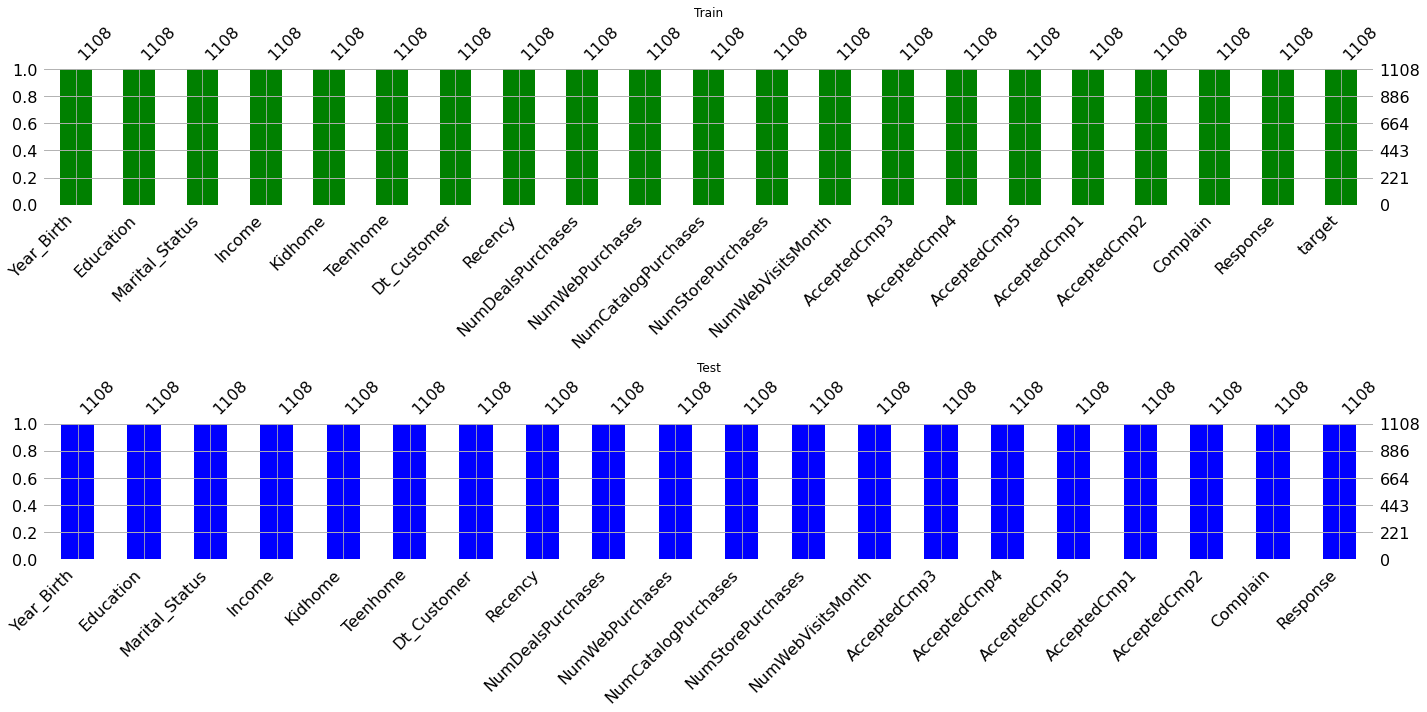

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(20,10))

msno.bar(train, color='green', ax=axes[0])
axes[0].set_title('Train')

msno.bar(test, color='blue', ax=axes[1])
axes[1].set_title("Test")

fig.tight_layout()

In [ ]:
# Martial_Status, Education, Dt_Customer를 제외하면 모두 수치형 변수이다
print("TRAIN")
display(train.info())
print("TEST")
display(test.info())

TRAIN
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1107
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1108 non-null   int64  
 1   Education            1108 non-null   object 
 2   Marital_Status       1108 non-null   object 
 3   Income               1108 non-null   float64
 4   Kidhome              1108 non-null   int64  
 5   Teenhome             1108 non-null   int64  
 6   Dt_Customer          1108 non-null   object 
 7   Recency              1108 non-null   int64  
 8   NumDealsPurchases    1108 non-null   int64  
 9   NumWebPurchases      1108 non-null   int64  
 10  NumCatalogPurchases  1108 non-null   int64  
 11  NumStorePurchases    1108 non-null   int64  
 12  NumWebVisitsMonth    1108 non-null   int64  
 13  AcceptedCmp3         1108 non-null   int64  
 14  AcceptedCmp4         1108 non-null   int64  
 15  AcceptedCmp5         1108 non-nu

None

TEST
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1107
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1108 non-null   int64  
 1   Education            1108 non-null   object 
 2   Marital_Status       1108 non-null   object 
 3   Income               1108 non-null   float64
 4   Kidhome              1108 non-null   int64  
 5   Teenhome             1108 non-null   int64  
 6   Dt_Customer          1108 non-null   object 
 7   Recency              1108 non-null   int64  
 8   NumDealsPurchases    1108 non-null   int64  
 9   NumWebPurchases      1108 non-null   int64  
 10  NumCatalogPurchases  1108 non-null   int64  
 11  NumStorePurchases    1108 non-null   int64  
 12  NumWebVisitsMonth    1108 non-null   int64  
 13  AcceptedCmp3         1108 non-null   int64  
 14  AcceptedCmp4         1108 non-null   int64  
 15  AcceptedCmp5         1108 non-nul

None

In [ ]:
train.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,0.069495,0.085740,0.072202,0.068592,0.015343,0.009025,0.141697,617.121841
std,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,0.254408,0.280106,0.258939,0.252873,0.122968,0.094614,0.348896,603.587972
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.750000
50%,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.000000
75%,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1068.750000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


In [ ]:
# train set의 수치형 변수들과 어느 정도 비슷한 분포를 지니는 것 같다
test.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,1968.939531,52418.693141,0.453971,0.499097,47.869134,2.307762,3.986462,2.651625,5.696751,5.289711,0.077617,0.062274,0.074007,0.059567,0.011733,0.009928,0.158845
std,11.745146,28526.498074,0.528033,0.536810,28.778160,1.904697,2.667140,3.056459,3.191864,2.446169,0.267689,0.241762,0.261901,0.236789,0.107730,0.099187,0.365696
min,1899.000000,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.750000,34678.000000,0.000000,0.000000,23.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51171.500000,0.000000,0.000000,47.000000,2.000000,3.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68695.000000,1.000000,1.000000,72.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,15.000000,25.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 범주형 변수 전처리(Year-Birth도 함께)

#### Year_Birth

In [ ]:
# 나이로 바꿔주고, 원래 열을 삭제한다.
train['Age'] = train['Year_Birth'].apply(lambda x: 2022 - x)
test['Age'] = test['Year_Birth'].apply(lambda x: 2022 - x)

In [ ]:
train.drop('Year_Birth', axis=1, inplace=True)
test.drop('Year_Birth', axis=1, inplace=True)

In [ ]:
train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Age
id,,,,,,,,,,,,,,,,,,,,,
0,Master,Together,46014.0,1,1,21-01-2013,21,10,7,1,8,7,0,0,0,0,0,0,0,541,48
1,Graduation,Single,76624.0,0,1,24-05-2014,68,1,5,10,7,1,1,0,0,0,0,0,0,899,60
2,Graduation,Married,75903.0,0,1,08-04-2013,50,2,6,6,9,3,0,0,0,0,0,0,0,901,71
3,Basic,Married,18393.0,1,0,29-03-2014,2,2,3,0,3,8,0,0,0,0,0,0,0,50,48
4,PhD,Together,64014.0,2,1,10-06-2014,56,7,8,2,5,7,0,0,0,1,0,0,0,444,76


#### Education

In [ ]:
# Test set에서 Master, 2n Cycle, Basic의 수가 조금 더 많이 나타나기는 했지만 전체적으로 분포가 비슷한 것 같다.
print("TRAIN")
display(train['Education'].value_counts())
print("TEST")
display(test['Education'].value_counts())

TRAIN


Graduation    570
PhD           254
Master        173
2n Cycle       89
Basic          22
Name: Education, dtype: int64

TEST


Graduation    546
PhD           227
Master        192
2n Cycle      111
Basic          32
Name: Education, dtype: int64

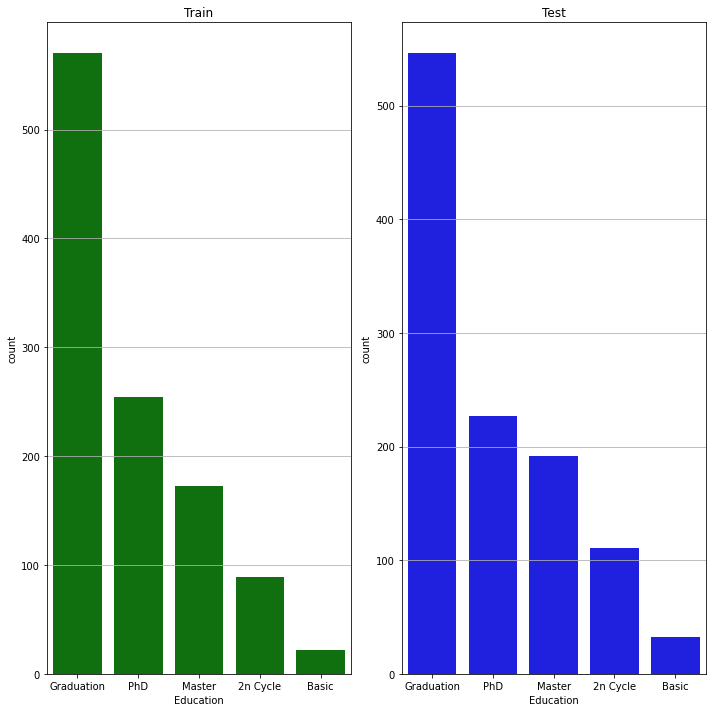

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10,10))
sns.countplot(x='Education', data=train, color='green', order=train['Education'].value_counts().index, ax=axes[0])
axes[0].set_title('Train')

sns.countplot(x='Education', data=test, color='blue', order=train['Education'].value_counts().index, ax=axes[1])
axes[1].set_title("Test")

fig.tight_layout()

In [ ]:
# Education에 따라 위와 같은 순서로 지출이 나옴을 알 수 있음
# 그룹간에 확연한 차이가 존재함을 확인
education_groupby = train.groupby('Education')['target'].median().sort_values(ascending=False)
print(education_groupby)

Education
PhD           506.5
Master        415.0
Graduation    370.5
2n Cycle      341.0
Basic          57.5
Name: target, dtype: float64


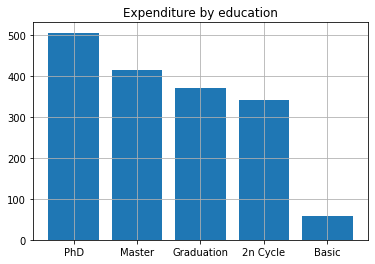

In [ ]:
plt.bar(x=education_groupby.index, height=education_groupby)
plt.title("Expenditure by education")
plt.show()

In [ ]:
map_class1 = {'Basic':0, '2n Cycle':1, 'Graduation':2, 'Master':3, 'PhD':4}
train[['Education']] = train[['Education']].applymap(map_class1.get)
test[['Education']] = test[['Education']].applymap(map_class1.get)

#### Marital_Status

In [ ]:
# 전체적으로 분포가 비슷한 것을 확인했다.그리고 Absurd, Alone, YOLO 같은 경우에는 그 값이 극도로 적음을 확인했다.
# 의미상 Single에 넣는 것이 가장 적합할 것 같으니 Single에 포함시키도록 한다
print("TRAIN")
display(train['Marital_Status'].value_counts())
print("TEST")
display(test['Marital_Status'].value_counts())

TRAIN


Married     415
Together    296
Single      234
Divorced    120
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: Marital_Status, dtype: int64

TEST


Married     442
Together    277
Single      237
Divorced    112
Widow        37
Absurd        1
Alone         1
YOLO          1
Name: Marital_Status, dtype: int64

In [ ]:
train[['Marital_Status']] = train[['Marital_Status']].replace(['Alone', 'YOLO', 'Absurd'], 'Single')
test[['Marital_Status']] = test[['Marital_Status']].replace(['Alone', 'YOLO', 'Absurd'], 'Single')

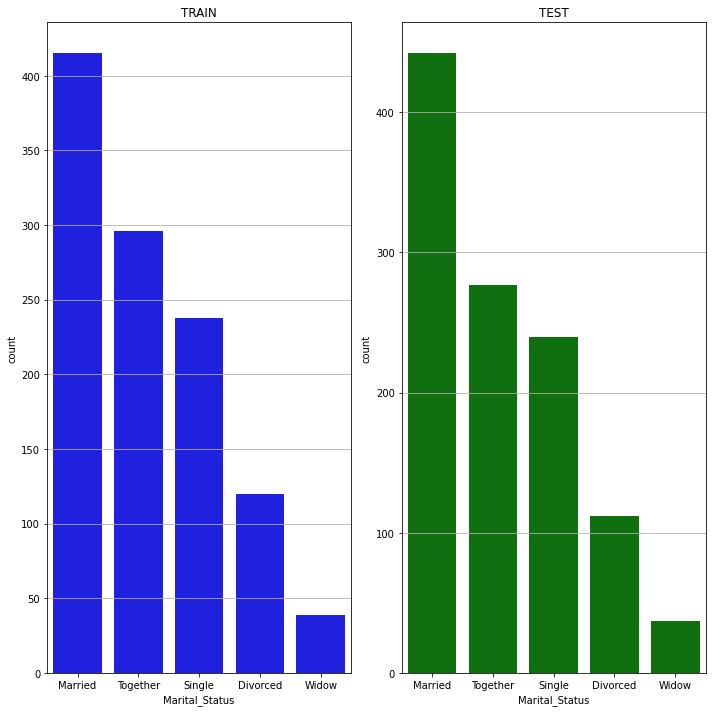

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10,10))
sns.countplot(x='Marital_Status', data=train, color='blue', order=train.Marital_Status.value_counts().index, ax=axes[0])
axes[0].set_title('TRAIN')
sns.countplot(x='Marital_Status', data=test, color='green', order=train.Marital_Status.value_counts().index, ax=axes[1])
axes[1].set_title("TEST")
fig.tight_layout()

In [ ]:
marital_status_groupby = train.groupby('Marital_Status')['target'].median().sort_values(ascending=False)
print(marital_status_groupby)

Marital_Status
Widow       606.0
Divorced    514.0
Married     410.0
Single      395.5
Together    379.0
Name: target, dtype: float64


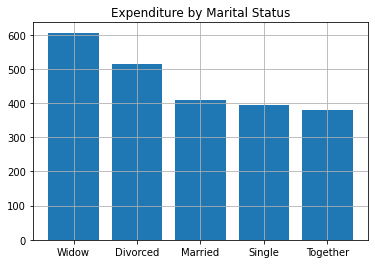

In [ ]:
# window, divorced, 나머지그룹은 차이가 많이 나지만, Married, Single, Together은 큰 차이가 없는 것 처럼 보인다
# 그렇지만 일단 target value 순으로 label인코딩을 하도록 하자
plt.bar(x=marital_status_groupby.index, height=marital_status_groupby)
plt.title('Expenditure by Marital Status')
plt.show()

In [ ]:
# 이번에는 함수를 만들어서 동일한 작업을 실행해 보도록 하자
train_df = train.copy()
def mapping_by_target_value(data, feature):
  groupby_feature = train_df.groupby(feature)['target'].median().sort_values(ascending=True)
  map_class = {}
  for i, j in enumerate(groupby_feature.index):
    map_class[j] = i
  data[[feature]] = data[[feature]].applymap(map_class.get)

In [ ]:
mapping_by_target_value(train, 'Marital_Status')
mapping_by_target_value(test, 'Marital_Status')

In [ ]:
test.Marital_Status

id
0       1
1       0
2       2
3       2
4       0
       ..
1103    2
1104    0
1105    1
1106    0
1107    1
Name: Marital_Status, Length: 1108, dtype: int64

#### Dt_Customer

In [ ]:
# 날짜를 연, 월, 일로 분리해 각각의 칼럼을 만들어주고, 기존의 열은 삭제 하기로 한다.
train['Year'] = train['Dt_Customer'].str.split("-").str[2].astype('int')
train['Month'] = train['Dt_Customer'].str.split("-").str[1].astype('int')
train['Day'] = train['Dt_Customer'].str.split("-").str[0].astype('int')

test['Year'] = test['Dt_Customer'].str.split("-").str[2].astype('int')
test['Month'] = test['Dt_Customer'].str.split("-").str[1].astype('int')
test['Day'] = test['Dt_Customer'].str.split("-").str[0].astype('int')

In [ ]:
train.drop('Dt_Customer', axis=1, inplace=True)
test.drop("Dt_Customer", axis=1, inplace=True)

In [ ]:
train['Year'] = train['Year'].apply(lambda x : 2022-x)
test['Year'] = test['Year'].apply(lambda x: 2022-x)

In [ ]:
# Groupby를 통해 확인해 본 결과, 연월일에 따라 target값이 달라진다는 것을 확인할 수 있다.
groupby_year = train.groupby("Year")['target'].median().sort_values(ascending=False)
groupby_month = train.groupby("Month")['target'].median().sort_values(ascending=False)
groupby_day = train.groupby("Day")['target'].median().sort_values(ascending=False)
display(groupby_year)
display(groupby_month)
display(groupby_day)

Year
10    601.5
9     421.0
8     149.0
Name: target, dtype: float64

Month
11    747.0
9     599.0
2     540.0
6     426.0
1     422.0
3     401.0
10    398.0
8     360.0
5     326.0
4     241.5
12    235.0
7     151.0
Name: target, dtype: float64

Day
5     913.5
25    778.0
23    752.5
2     688.5
14    603.5
24    514.5
21    500.0
17    473.0
7     470.0
1     461.0
3     449.5
20    429.5
19    422.0
26    421.5
18    421.0
31    421.0
12    415.0
16    413.0
22    402.5
9     339.5
28    335.0
11    318.5
8     311.0
29    302.0
6     281.5
27    242.0
4     231.0
13    199.0
15    194.0
10    140.0
30     82.5
Name: target, dtype: float64

### 데이터의 분포 확인하기 & 스케일링

In [ ]:
len(train.columns.drop('target'))

22

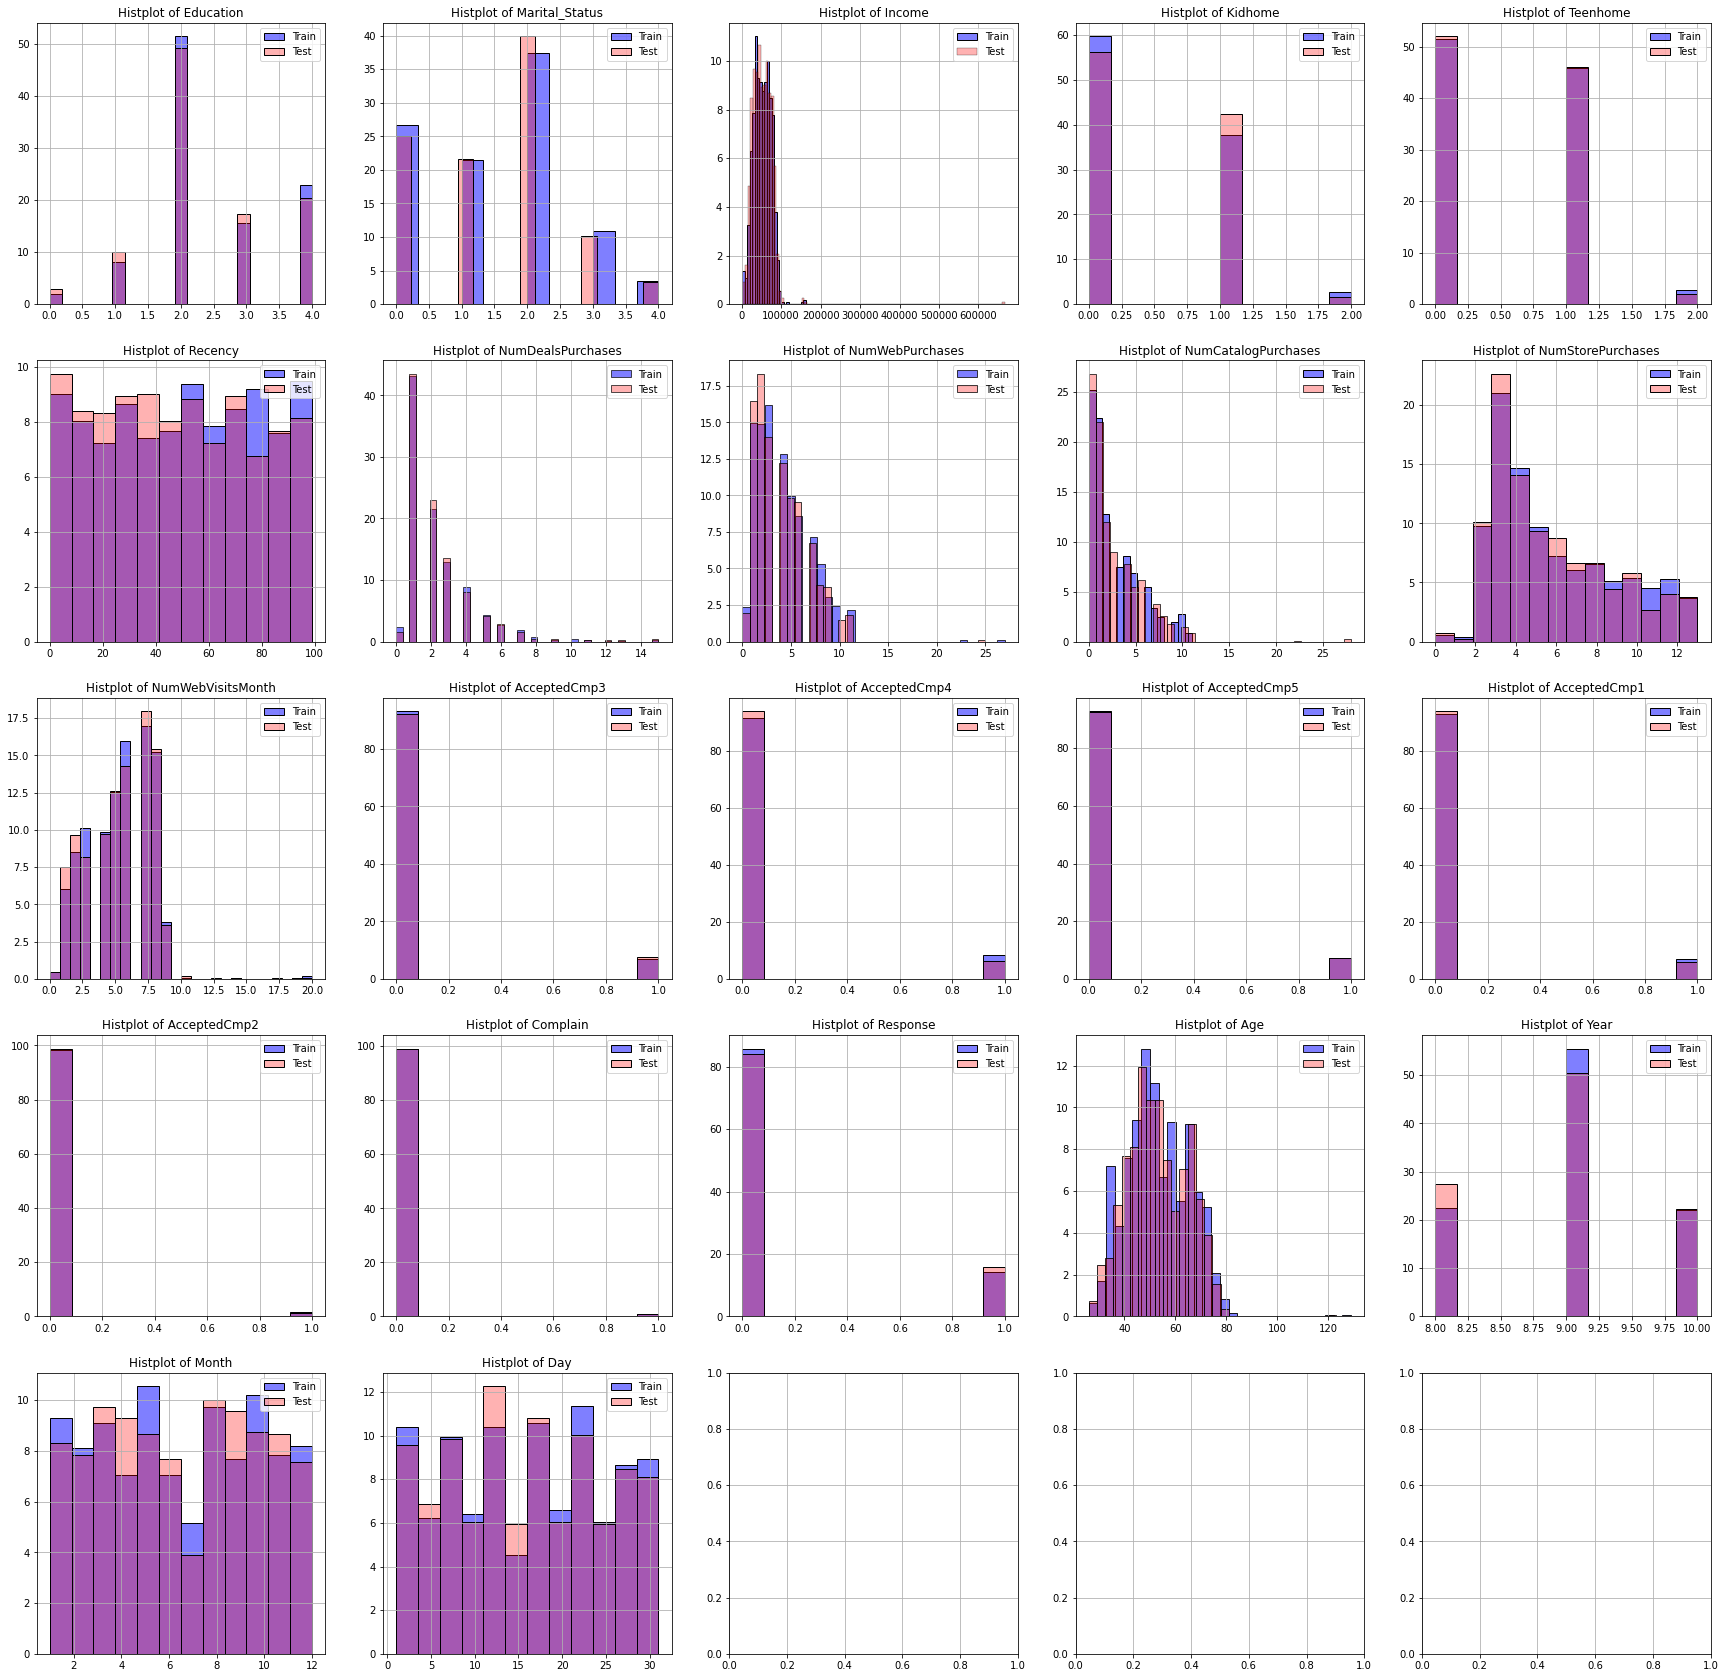

In [ ]:
# percent = sum은 막대들의 높이의 합이 100이 되도록 하는 것
# 양의 왜도를 지니는 데이터들도 상당히 많이 보인다.
fit, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (30, 30))

column_list = train.columns.drop('target')

for index, column in enumerate(column_list):
    
    row = index // 5
    col = index % 5
    
    # Train data
    sns.histplot(x = column, data = train, stat = "percent", color = "blue", alpha = 0.5, label = "Train", ax = axes[row][col])
    
    # Test data
    sns.histplot(x = column, data = test, stat = "percent", color = "red", alpha = 0.3, label = "Test", ax = axes[row][col])
    
    axes[row][col].set_title("Histplot of {}".format(column))
    axes[row][col].set_xlabel("")
    axes[row][col].set_ylabel("")
    axes[row][col].legend()
    
fig.tight_layout()

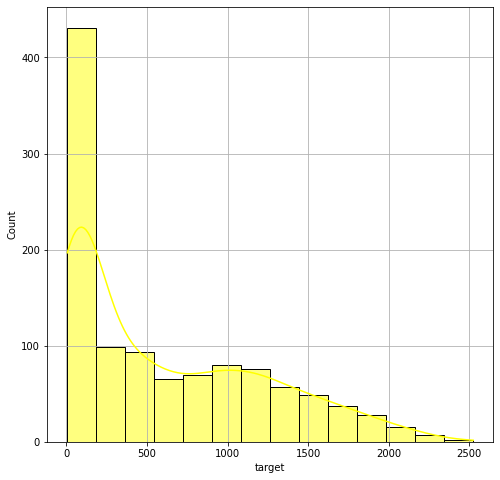

In [ ]:
# target 값의 분포는 다음과 같다. 양의 왜도를 띄는 데이터이다
# 0의 개수도 상당히 많다
plt.figure(figsize=(8,8))
sns.histplot(x='target', data=train, color='yellow', kde=True)

#### 스케일링

In [ ]:
# 일단 scaling 사용해서 scaling을 해보도록 한다. 이상치들이 많기 때문에 RobustScaler를 사용해보기로 한다.
X_train = train.drop('target', axis=1)
y_train = train['target']
X_test = test

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
train_scaled = train.copy()
train_scaled[train.columns.drop('target')] = X_train

test_scaled = pd.DataFrame(X_test, columns=train.columns.drop('target'))

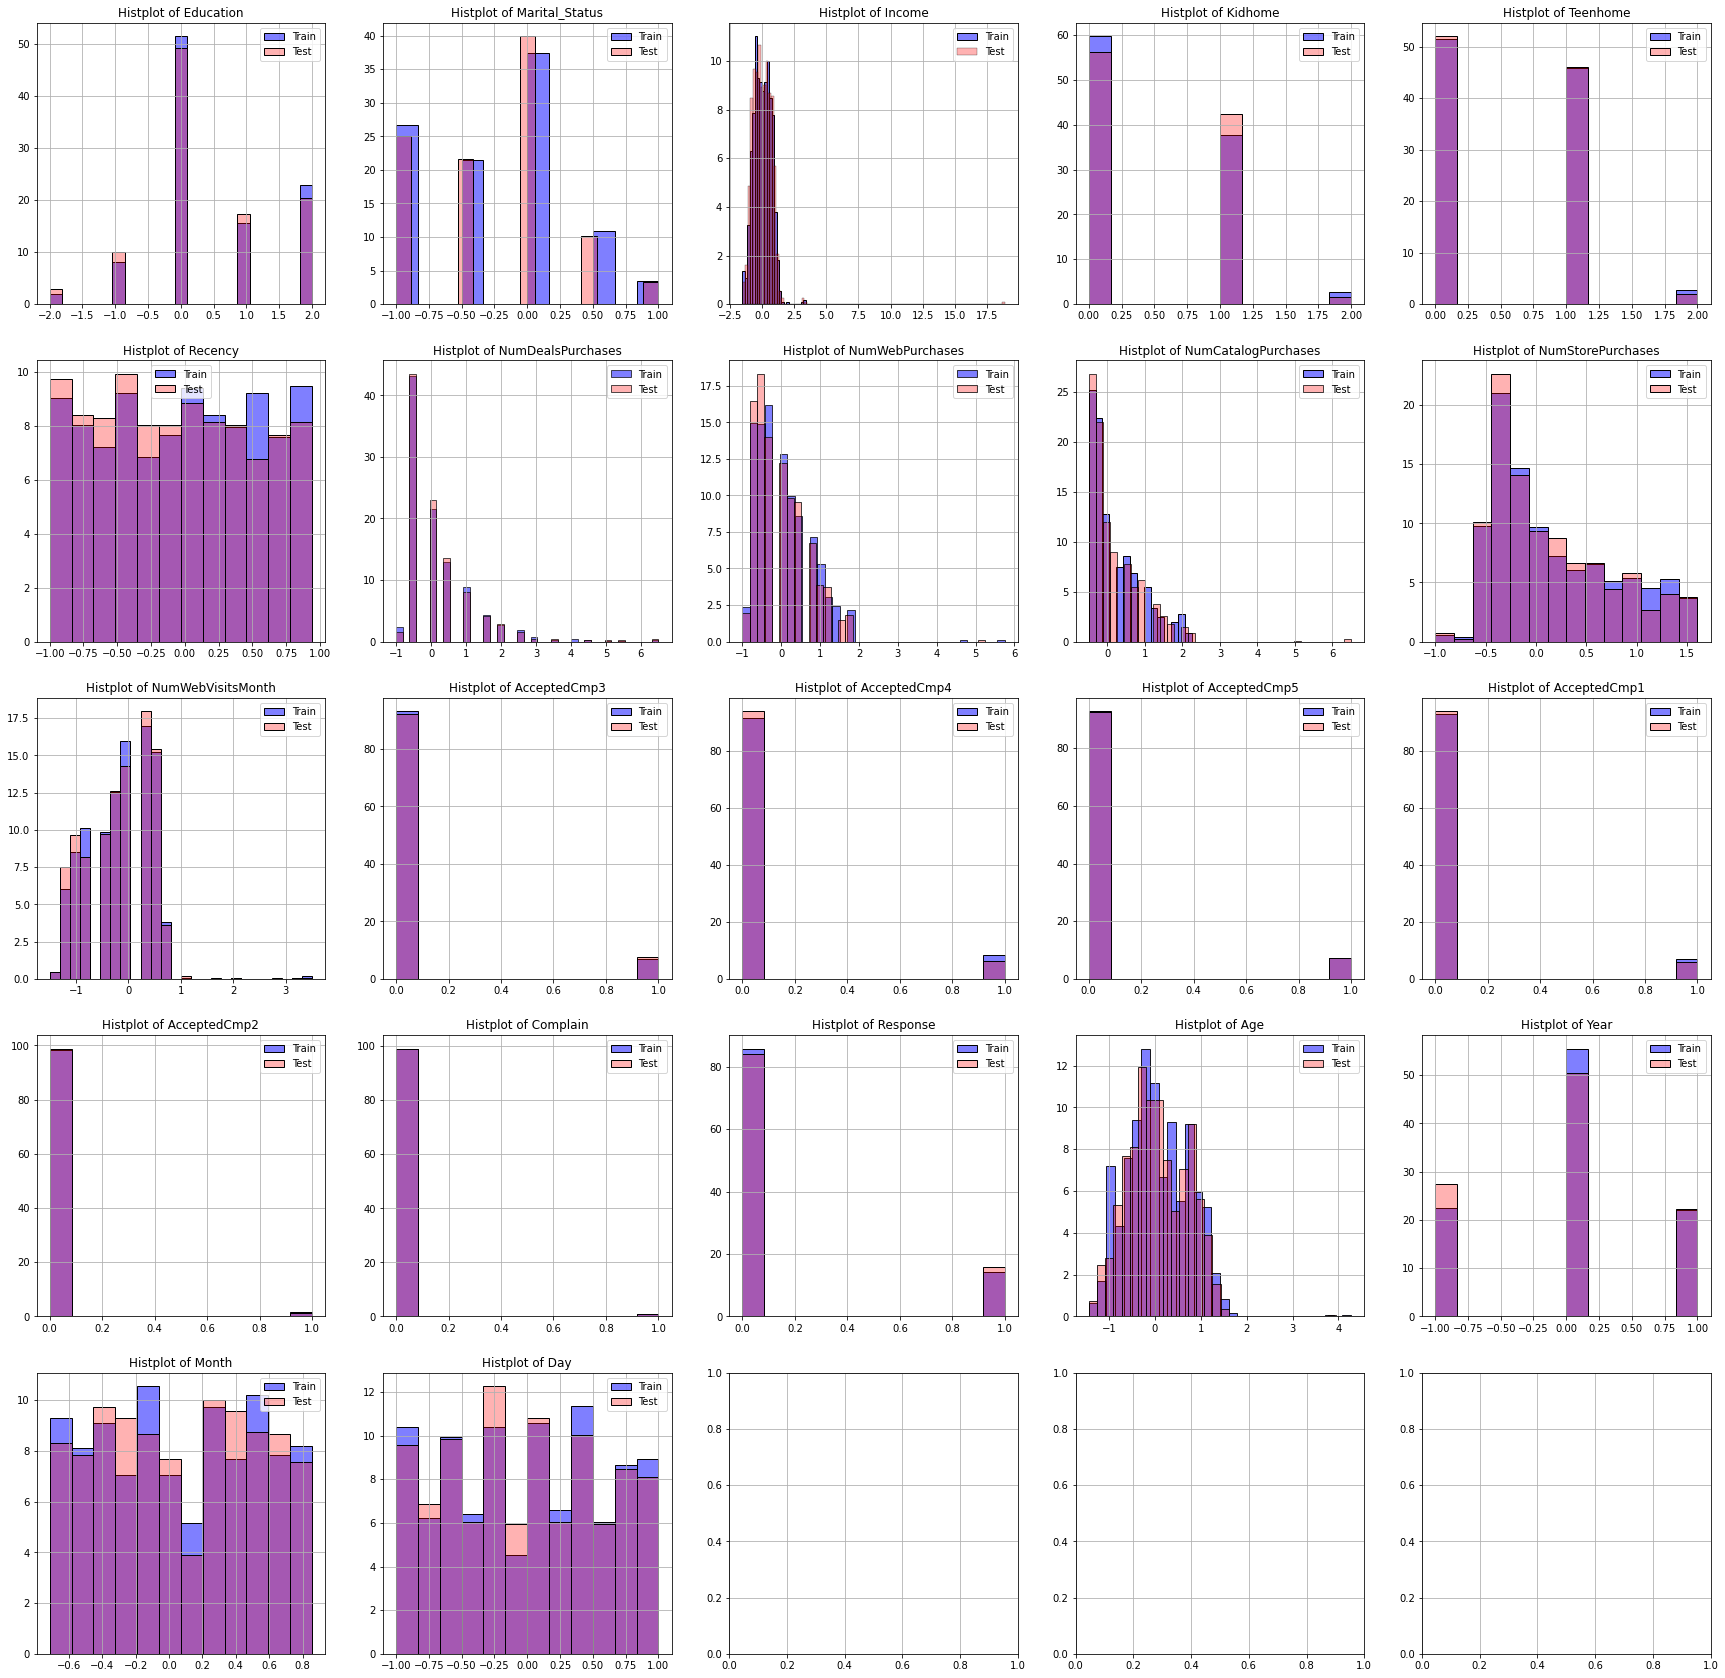

In [ ]:
# 다시 히스토그램을 그려보면 아래와 같다
fit, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (30, 30))

column_list = train.columns.drop('target')

for index, column in enumerate(column_list):
    
    row = index // 5
    col = index % 5
    
    # Train data
    sns.histplot(x = column, data = train_scaled, stat = "percent", color = "blue", alpha = 0.5, label = "Train", ax = axes[row][col])
    
    # Test data
    sns.histplot(x = column, data = test_scaled, stat = "percent", color = "red", alpha = 0.3, label = "Test", ax = axes[row][col])
    
    axes[row][col].set_title("Histplot of {}".format(column))
    axes[row][col].set_xlabel("")
    axes[row][col].set_ylabel("")
    axes[row][col].legend()
    
fig.tight_layout()

## 모델 사용하기

### pycaret 사용하기

#### pycaret 설치하기

In [ ]:
!pip install markupsafe==2.0.1

In [ ]:
!pip install pycaret

In [ ]:
# 위의 코드들을 통해 설치를 한 후, 런타임을 다시 시작해줘야 한다
import jinja2

In [ ]:
import pandas as pd
from pycaret.regression import *

#### pycaret 사용해보기

In [ ]:
# 이미 전처리를 했기 때문에 따로 설정해 주지는 않는다.
setup_regressor = setup(data=train_scaled, target='target')

,Description,Value
0,session_id,4824
1,Target,target
2,Original Data,"(1108, 23)"
3,Missing Values,False
4,Numeric Features,15
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(775, 22)"


In [ ]:
# create_model을 사용해서 randomforest모델을 만들고, 그 성능을 평가해본다(cv=5)
rf = create_model('rf', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,117.4614,42496.5232,206.1468,0.8794,0.3157,0.2694
1,129.1269,43983.4441,209.7223,0.8652,0.2881,0.2442
2,147.2979,64589.0152,254.1437,0.8513,0.3178,0.2695
3,117.7296,43390.9636,208.3050,0.8883,0.2772,0.2317
4,95.7047,33377.4367,182.6949,0.9086,0.5043,0.9561
Mean,121.4641,45567.4766,212.2025,0.8786,0.3406,0.3942
Std,16.8500,10267.3573,23.1852,0.0196,0.0833,0.2813


In [ ]:
# Compare_model을 사용해, 그 성능을 평가해보고, 상위 5개 모델을 선정해본다(MAE기준, cv=5)
# MAE기준 상위 5개의 모델은(etc, rf, lgb, gbm, dt)
models = compare_models(sort='MAE', fold=5, n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,119.1349,44745.6895,210.2916,0.8805,0.3216,0.3252,0.574
rf,Random Forest Regressor,121.4641,45567.4766,212.2025,0.8786,0.3406,0.3942,0.696
lightgbm,Light Gradient Boosting Machine,123.6023,46110.7127,213.0962,0.8751,0.4122,0.4123,0.194
gbr,Gradient Boosting Regressor,125.7237,42754.0785,205.7387,0.8853,0.4817,0.4573,0.124
dt,Decision Tree Regressor,164.2413,91883.6245,299.5886,0.7563,0.4176,0.3627,0.018
huber,Huber Regressor,167.2738,71954.7893,266.9577,0.8075,0.7148,0.8812,0.052
knn,K Neighbors Regressor,168.0483,72836.8134,269.2289,0.8047,0.5740,0.9072,0.072
par,Passive Aggressive Regressor,169.2640,75109.8494,272.2780,0.7995,0.7068,0.8245,0.018
llar,Lasso Least Angle Regression,179.4528,73077.1890,268.5937,0.8050,0.6728,1.1668,0.018
lasso,Lasso Regression,180.9458,70619.4637,264.5813,0.8109,0.7610,1.3410,0.016


In [ ]:
# tune_model을 사용해 HP Tuning을 진행해준다.
tuned_models = [tune_model(i, optimize='MAE',fold=5) for i in models]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,149.0905,58346.8435,241.5509,0.8344,0.3857,0.3427
1,160.3413,60989.8466,246.9612,0.8131,0.3597,0.3121
2,185.8549,88358.0327,297.2508,0.7965,0.3773,0.3193
3,130.7718,50888.8414,225.5856,0.8690,0.3401,0.2722
4,143.5064,57022.2115,238.7932,0.8439,0.5873,1.4042
Mean,153.9130,63121.1551,250.0283,0.8314,0.4100,0.5301
Std,18.5940,13046.5561,24.6370,0.0250,0.0900,0.4377


In [ ]:
# 튜닝된 결과는 다음과 같다
print(tuned_models)

[ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae', max_depth=8,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.02, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=260, n_jobs=-1,
                    oob_score=False, random_state=4824, verbose=0,
                    warm_start=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=8, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.02,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=260, n_jobs=-1, oob_score=False,
                      random_state=4824, verbose=0, warm_start=False), LGBMRegressor(bagging_fraction=

In [ ]:
# blend_model을 사용해 blending을 진행해준다.
blending = blend_models(estimator_list=tuned_models, fold=5, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,120.0023,37398.8331,193.3878,0.8938,0.3519,0.3293
1,128.2618,42546.4961,206.2680,0.8696,0.3032,0.2669
2,152.6092,62722.2968,250.4442,0.8556,0.4132,0.4039
3,115.0490,41420.5248,203.5203,0.8933,0.3230,0.2849
4,98.2339,31546.7908,177.6142,0.9136,0.5267,0.8917
Mean,122.8312,43126.9883,206.2469,0.8852,0.3836,0.4353
Std,17.8315,10527.4673,24.2736,0.0203,0.0806,0.2330


In [ ]:
print(blending)

VotingRegressor(estimators=[('et',
                             ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0,
                                                 criterion='mae', max_depth=8,
                                                 max_features=1.0,
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.02,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=2,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=260, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=4824, verbo...
            

In [ ]:
# 모델을 finalize하고, 예측을 진행함
final_model = finalize_model(blending)
prediction = predict_model(final_model, data=test_scaled)

In [ ]:
print(prediction)

      Education  Marital_Status    Income  Kidhome  Teenhome   Recency  \
0           0.0            -0.5  0.182068      1.0       0.0  0.627451   
1           0.0            -1.0  0.434276      0.0       1.0  0.137255   
2           0.0             0.0  0.117473      1.0       0.0 -0.588235   
3           0.0             0.0  0.494725      0.0       1.0 -0.843137   
4           0.0            -1.0  1.044231      0.0       1.0  0.745098   
...         ...             ...       ...      ...       ...       ...   
1103        0.0             0.0 -0.488551      1.0       1.0  0.058824   
1104        1.0            -1.0 -0.481793      1.0       1.0  0.098039   
1105        2.0            -0.5 -0.541013      0.0       0.0 -0.098039   
1106        0.0            -1.0  0.713974      1.0       2.0  0.764706   
1107        1.0            -0.5 -0.169290      1.0       1.0  0.686275   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                   1.0             0.00      

## 제출파일 생성하기

In [ ]:
submission = pd.read_csv('sample_submission (2).csv')

In [ ]:
submission['target'] = prediction['Label']

In [ ]:
print(submission)

        id       target
0        0   574.763542
1        1   966.076080
2        2   868.768883
3        3  1189.532642
4        4  1306.606422
...    ...          ...
1103  1103    94.371068
1104  1104    34.321654
1105  1105    71.103794
1106  1106  1258.127593
1107  1107   129.316182

[1108 rows x 2 columns]


In [ ]:
submission.to_csv('pycaret1.csv', index=False)